Import thư viện

In [270]:
import numpy as np 
from numpy import log,dot,exp,shape
import pandas as pd
import matplotlib.pyplot as plt # Các bạn có thể thử plot chart bằng plotly
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 1: Implement hàm sigmoid

In [271]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

# 2: Implement lại Logistic Regression

In [272]:
def standardize(X_tr):
    # Normalize lại các giá trị để có thể tính toán một cách "mượt" hơn 
    # Sau này, khi xây dựng model, các bạn nên normalize lại dữ liệu trước khi train
    mean = np.mean(X_tr, axis = 0) # X_tr chi la ma tran 1 hang => mean theo cot
    std = np.std(X_tr,  axis = 0) # X_tr chi la ma tran 1 hang => stadardize theo cot ra 1 con so 
    X_standardize = (X_tr - mean)/ std  # Ma tran X da standardized 
    return X_standardize

def f1_score(y,y_hat):
    true_positive, false_negative, false_positive, true_negative = 0,0,0,0
    y = np.array(y)
    y_hat = np.array(y_hat)

    # for i in range(len(y)):
    #     if y[i] == 1 and y_hat[i] == 1:
    #         true_positive += 1
    #     elif y[i] == 1 and y_hat[i] == 0:
    #         false_negative += 1
    #     elif y[i] == 0 and y_hat[i] == 1:
    #         false_positive += 1
    #     elif y[i] == 0 and y_hat[i] == 0:
    #         true_negative += 1
            
    true_positive = np.sum((y == 1) & (y_hat == 1)) # tinh tong so luong True positive
    false_positive = np.sum((y == 0) & (y_hat == 1)) # tinh tong so luong False positive
    false_negative = np.sum((y == 1) & (y_hat == 0)) # tinh tong so luong False Negative
    pecision = true_positive / (true_positive + false_positive) # phan tram True tren Tp + Fp
    recall = true_positive / (true_positive + false_negative) # phan tram True tren Tp + Fn
    f1 = 2*(pecision * recall) / (pecision + recall) if (pecision + recall) > 0 else 0
    return f1

# x = np.array([[2, 3, 2.2 , 2.4, 2.6 , 2.8 ,3]])
# y = np.log(x)
# print(y)

In [273]:
class LogisticRegression:
    def __init__(self, learning_rate = 0.01, num_epoch = 100, thresh = 0.5):
        self._learning_rate = learning_rate
        self._num_epoch = num_epoch
        self._thresh = thresh
        self.loses = []

    def _initialize(self,X):
        self.weight = np.zeros(X.shape[1])
        self.bias = 0

    def fit(self, X, y):
        self._initialize(X)
        for i in range(self._num_epoch):
            # tinh linear 
            linear = np.dot(X, self.weight) + self.bias
            # uon linear
            y_pred = sigmoid(linear)
            # tinh loss
            L = -np.mean(y*np.log(y_pred) + (1- y)*np.log(1 - y_pred))
            self.loses.append(L)
            # tinh  dao ham voi weight va bias
            self.weight = (1/len(X))*np.dot(X.T, y_pred - y)
            self.bias = (1/len(X))*np.sum(y_pred - y)
            # self.weight = (np.dot(X.T, y_pred - y))
            # self.bias = np.sum(y_pred - y)            
            #update weight and bias
            self.weight -=  self._learning_rate *self.weight
            self.bias -=  self._learning_rate *self.bias

    @property
    
    def loss_hist(self): # ve hinh
        # tra ve gia tri losses cho ve hinh.
        plt.scatter([i for i in range(self._num_epoch)], self.loses, c='red', s=10, label='loss')
        # plt.plot(self.loses)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        # return self.loses
        

    def predict(self,X):
        y_pred = np.dot(X, self.weight) +self.bias
        lis = []
        for i in y_pred:
            if i > self._thresh: 
                lis.append(1)
            else:
                lis.append(0)
        return lis




# 3a: Tạo dữ liệu

In [274]:
X, y = make_classification(n_samples = 200, n_features = 2, 
                           n_informative = 2, n_redundant = 0, 
                           n_repeated = 0, n_classes = 2, 
                           n_clusters_per_class = 1, random_state = 42)

''' 
 n_samples là số lượng mẫu dữ liệu được tạo ra.
 n_features là số lượng feature của mỗi mẫu.
 n_informative là số lượng feature có tác động đến kết quả dự đoán.
 n_redundant là số lượng feature trùng lặp với các feature khác.
 n_repeated là số lượng feature trùng lặp với chính nó.
 n_classes là số lượng lớp của bài toán classification.
 n_clusters_per_class là số lượng cluster của mỗi lớp.
'''
# print(X)
# print(y)

' \n n_samples là số lượng mẫu dữ liệu được tạo ra.\n n_features là số lượng feature của mỗi mẫu.\n n_informative là số lượng feature có tác động đến kết quả dự đoán.\n n_redundant là số lượng feature trùng lặp với các feature khác.\n n_repeated là số lượng feature trùng lặp với chính nó.\n n_classes là số lượng lớp của bài toán classification.\n n_clusters_per_class là số lượng cluster của mỗi lớp.\n'

#3b: Visualize dữ liệu

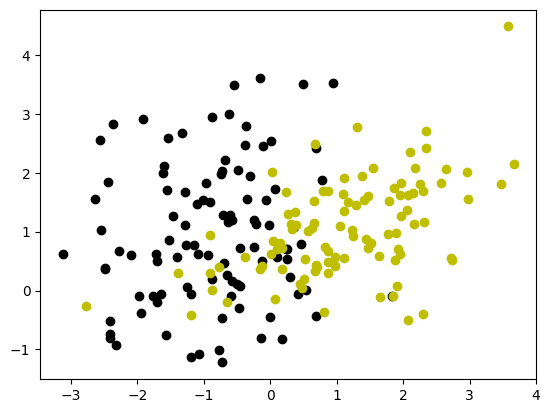

In [275]:
plt.scatter(X[y == 0][:,0],X[y == 0][:,1] ,color = 'k', label = "Class 0") 
plt.scatter(X[y == 1][:,0],X[y == 1][:,1] ,color = 'y', label = "Class 1")
# X y == 0 cot o va X y == 0 cot 1
# X y == 1 cot o va X y == 1 cot 1

# 3c: Chia dữ liệu thành train và test

In [276]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# 4: Fit dữ liệu với Logistic Regression

In [277]:
X_train = standardize(X_train)
X_test = standardize(X_test)

cls = LogisticRegression(num_epoch=400)
cls.fit(X_train, y_train)
y_test_pred = cls.predict(X_test)
y_train_pred = cls.predict(X_train)

# print(y_test_pred)
# print(y_train_pred)

# 4b: Tính f1-score

In [278]:
f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)
print("f1 score train: ",f1_score_train)
print("f1 score test: ", f1_score_test)

f1 score train:  0.019230769230769232
f1 score test:  0


# 4c: Visualize loss

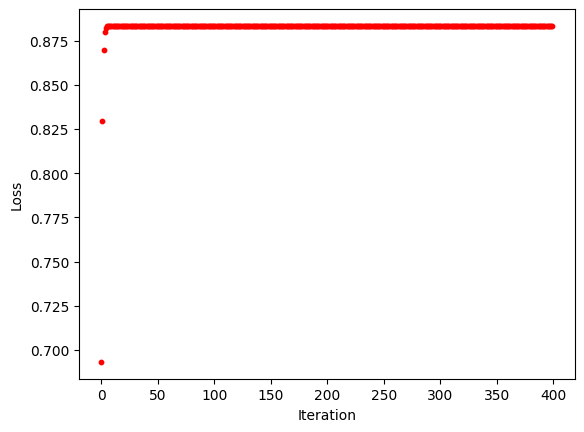

In [279]:
cls.loss_hist

f1 score train:  0.019230769230769232
f1 score test:  0


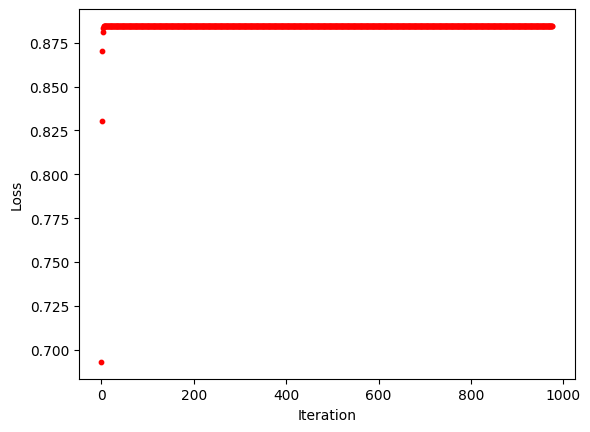

In [280]:
#@title # 5c Visualize loss với learning rate và iter khác nhau {"display-mode": "form"}
# Các bạn có thể thêm param "run": "auto" vào trong dictionary để cell tự động chạy khi bạn chỉnh param
lr = 0.006 #@param {type:"slider", min:0, max:1, step:0.0005}
iter = 977 #@param {type:"slider", min:0, max:1000, step:1}

# Phần trên dành cho các bạn sử dụng Google Colab, với các bạn sử dụng Jupyter , các bạn hãy xoá tất cả và chạy code trong ô này nhé!
cls = LogisticRegression( num_epoch=iter, learning_rate= lr)
model= cls.fit(X_train, y_train)
y_test_pred = cls.predict(X_test)
y_train_pred = cls.predict(X_train)

#Let's see the f1-score for training and testing data
f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)
print("f1 score train: ",f1_score_train)
print("f1 score test: ", f1_score_test)
cls.loss_hist